In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [2]:
# variables as per problem generation

np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# QUESTION 1

In [7]:
# creating the polinomial separations
X_pol_3 = PolynomialFeatures(degree=3)
X_pol_6 = PolynomialFeatures(degree=6)
X_pol_9 = PolynomialFeatures(degree=9)
X_poly_3 = X_pol_3.fit_transform(X_train.reshape(-1, 1))
X_poly_6 = X_pol_6.fit_transform(X_train.reshape(-1, 1))
X_poly_9 = X_pol_9.fit_transform(X_train.reshape(-1, 1))

lin_1 = LinearRegression()
lin_1.fit(X_train.reshape(-1, 1), y_train)

lin_3 = LinearRegression()
lin_3.fit(X_poly_3, y_train)
lin_6 = LinearRegression()
lin_6.fit(X_poly_6, y_train)
lin_9 = LinearRegression()
lin_9.fit(X_poly_9, y_train)


t_array = np.linspace(0,10,100).reshape(-1, 1)
t_array3 = X_pol_3.fit_transform(t_array)
t_array6 = X_pol_6.fit_transform(t_array)
t_array9 = X_pol_9.fit_transform(t_array)
sol_array = np.concatenate((lin_1.predict(t_array).reshape(1, -1), lin_3.predict(t_array3).reshape(1, -1), lin_6.predict(t_array6).reshape(1, -1), lin_9.predict(t_array9).reshape(1, -1)))
sol_array.shape

(4, 100)

# QUESTION 2

In [50]:
test_array = None
train_array = None

for i in range(0,10):
    poly = PolynomialFeatures(degree=i)

    X_train_i = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_i = poly.fit_transform(X_test.reshape(-1, 1))

    lngreg = LinearRegression()
    lngreg.fit(X_train_i, y_train)

    v1 = np.array(lngreg.score(X_test_i, y_test)).reshape(1)
    v2 = np.array(lngreg.score(X_train_i, y_train)).reshape(1)

    if test_array is None:
        test_array = v1
        train_array = v2
    else:
        test_array = np.concatenate((test_array, v1))
        train_array = np.concatenate((train_array, v2))

sol = (train_array, test_array)

# QUESTION 3

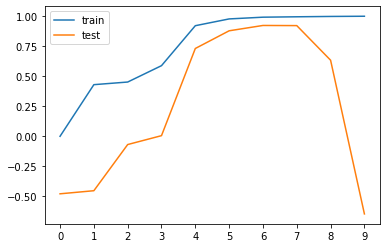

In [53]:
plt.plot(sol[0], label="train")
plt.plot(sol[1], label="test")
plt.xticks(list(range(0,10)))
plt.legend();

# QUESTION 4